In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor ,GradientBoostingRegressor
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score
pd.set_option('display.max_columns',None)
import calendar
from wordcloud import WordCloud

In [11]:
df = pd.read_csv('Train.csv')

In [5]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 34226
Total number of columns in dataset = 16


In [6]:
df.describe(exclude =['O']).T

,count,mean,std,min,25%,50%,75%,max
id,34226.0,1.898209e+07,1.097597e+07,2595.00000,9.460366e+06,1.965371e+07,2.908201e+07,3.648724e+07
host_id,34226.0,6.733847e+07,7.833091e+07,2438.00000,7.824440e+06,3.065628e+07,1.074344e+08,2.743115e+08
latitude,34226.0,4.072906e+01,5.460352e-02,40.49979,4.069004e+01,4.072299e+01,4.076320e+01,4.091306e+01
longitude,34226.0,-7.395207e+01,4.616065e-02,-74.24442,-7.398315e+01,-7.395570e+01,-7.393598e+01,-7.371299e+01
price,34226.0,1.534810e+02,2.433126e+02,0.00000,6.900000e+01,1.070000e+02,1.750000e+02,1.000000e+04
minimum_nights,34226.0,6.953690e+00,2.025583e+01,1.00000,1.000000e+00,2.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,34226.0,2.339093e+01,4.447682e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,27244.0,1.377074e+00,1.688953e+00,0.01000,1.900000e-01,7.300000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,34226.0,7.093905e+00,3.282841e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,34226.0,1.133017e+02,1.318928e+02,0.00000,0.000000e+00,4.500000e+01,2.290000e+02,3.650000e+02


In [12]:
df.set_index('id',inplace = True)

In [13]:
def missing_data(dataset):
    total = df.isnull().sum().sort_values(ascending= False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis =1, keys =['Total','Percent'])
    return missing_data

null_values = missing_data(df)
print(null_values.head())

                   Total    Percent
reviews_per_month   6982  20.399696
last_review         6982  20.399696
host_name             13   0.037983
name                  12   0.035061
availability_365       0   0.000000


In [14]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['month'] = pd.DatetimeIndex(df['last_review']).month
df['year'] = pd.DatetimeIndex(df['last_review']).year

In [15]:
df.isnull().sum().sort_values(ascending=False).head()

year                 6982
last_review          6982
month                6982
reviews_per_month    6982
host_name              13
dtype: int64

## ` Fill Missing Values`

In [16]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())
df['year'] = df['year'].fillna(df['year'].mode()[0])
df['month'] = df['month'].fillna(df['month'].mode()[0])

`Here, I have treated the missing values in reviews per month column with median as its a continous variable. For the the other two columns year and month, I have imputed missing values with mode as they are countable discrete values in them.`

In [17]:
df.isnull().sum().sort_values(ascending=False).head()

last_review    6982
host_name        13
name             12
room_type         0
host_id           0
dtype: int64

In [19]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'month', 'year'],
      dtype='object')

###   `I have treated the below continous columns having zero value in them with median to get a better understanding of the data`

In [20]:
df.loc[df.availability_365 == 0, 'availability_365'] = df.availability_365.median()
df.loc[df.number_of_reviews == 0, 'number_of_reviews'] = df.number_of_reviews.median()
df.loc[df.price == 0, 'price'] = df.price.median()

In [22]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,year
id,,,,,,,,,,,,,,,,,
5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120.0,7,3.0,2015-09-01,0.06,3,45.0,9.0,2015.0
2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500.0,1,5.0,NaT,0.73,1,45.0,6.0,2019.0
35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200.0,2,4.0,2019-07-05,4.00,1,365.0,7.0,2019.0
36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30.0,2,5.0,NaT,0.73,4,82.0,6.0,2019.0
3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115.0,1,16.0,2019-05-26,0.27,1,365.0,5.0,2019.0


In [24]:
df.dtypes

name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int32
minimum_nights                             int64
number_of_reviews                          int32
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int32
month                                      int32
year                                       int32
dtype: object

### `Converting data types to int for the below columns`

In [23]:
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['number_of_reviews'] = df['number_of_reviews'].astype(int)
df['price'] = df['price'].astype(int)
df['availability_365'] = df['availability_365'].astype(int)

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude='object').columns
print("Categorical Columns")
print(categorical_columns)
print("Numerical Columns")
print(numerical_columns)

Categorical Columns
Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')
Numerical Columns
Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'month', 'year'],
      dtype='object')


## `Univariate Analysis`

### `Categorical Columns`

In [27]:
text = df.name.str.cat(sep='')

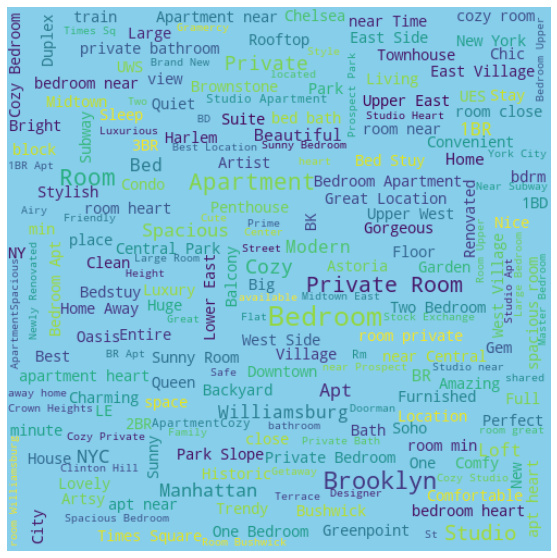

In [30]:
wordcloud = WordCloud(width=500, height=500, max_font_size=25, min_font_size=10,background_color="skyblue", max_words=200).generate(text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [33]:
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [34]:
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
#style.use('ggplot') # chosen style
style.use('seaborn-darkgrid')
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13)

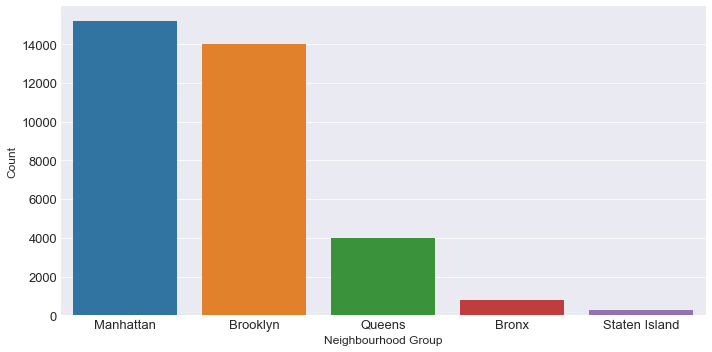

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(df['neighbourhood_group'],order = df['neighbourhood_group'].value_counts().index)
plt.xlabel('Neighbourhood Group',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
df.neighbourhood.nunique()

217

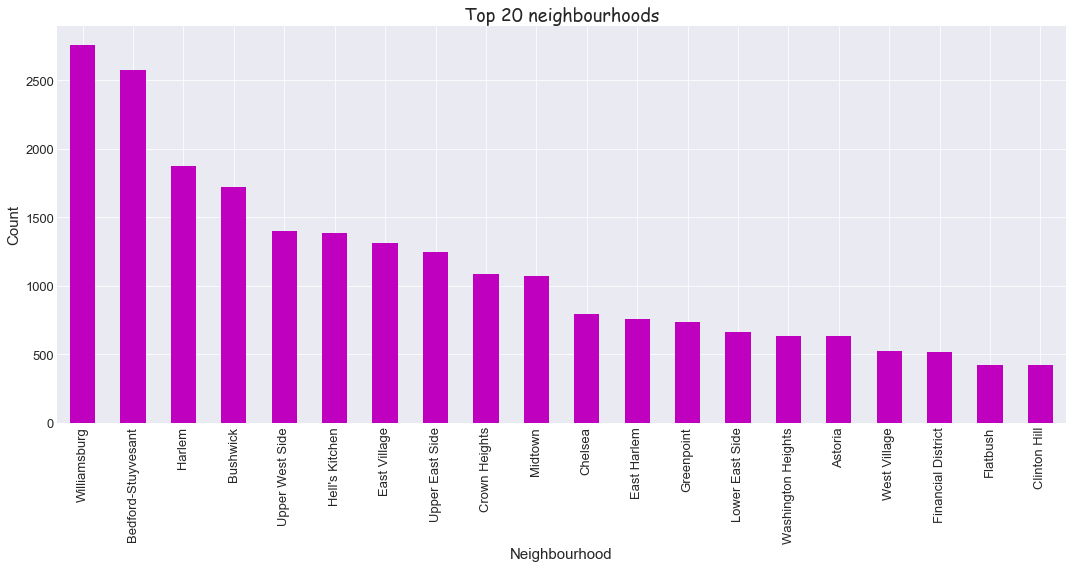

In [41]:
plt.figure(figsize=(15,8))
df.neighbourhood.value_counts().sort_values(ascending = False).head(20).plot(kind='bar',color ='m')
plt.xlabel('Neighbourhood',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Top 20 neighbourhoods',fontsize=18, fontname='Comic Sans MS')
#sns.countplot(df['neighbourhood'],order = df['neighbourhood'].value_counts().index)
plt.tight_layout()
plt.show()

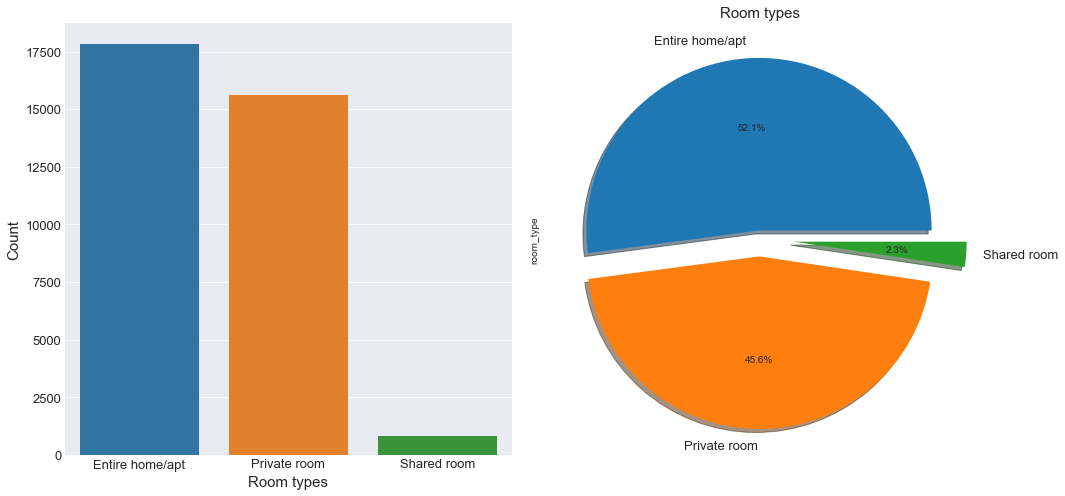

In [75]:
plt.figure(figsize=(15,7))
#df.neighbourhood_group.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.subplot(121)
sns.countplot(df['room_type'],order = df['room_type'].value_counts().index)
plt.xlabel('Room types',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
df.room_type.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.05,0.1,0.2])
plt.title('Room types',fontsize=15)
plt.tight_layout()
plt.show()

###  `Numerical Columns`

`Discrete Columns`

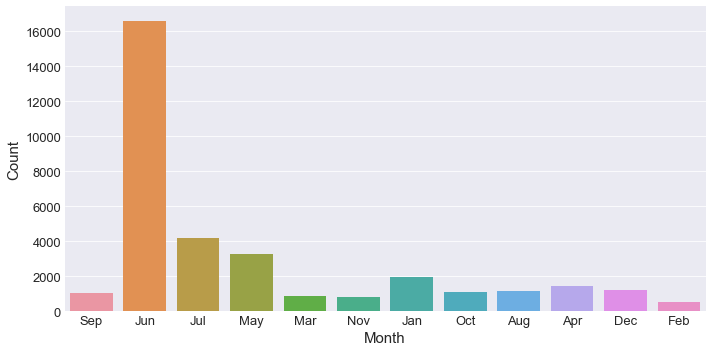

In [46]:
plt.figure(figsize=(10,5))
#df.neighbourhood_group.value_counts().sort_values(ascending=False).plot(kind='bar')
sns.countplot(df['month'].apply(lambda x: calendar.month_abbr[x]))
plt.xlabel('Month',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

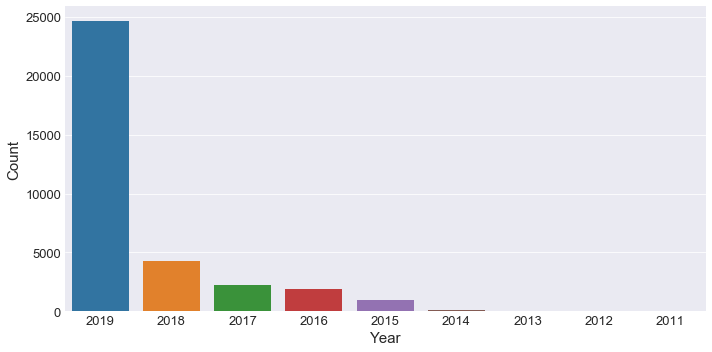

In [47]:
plt.figure(figsize=(10,5))
#df.neighbourhood_group.value_counts().sort_values(ascending=False).plot(kind='bar')
sns.countplot(df['year'],order = df['year'].value_counts().index)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

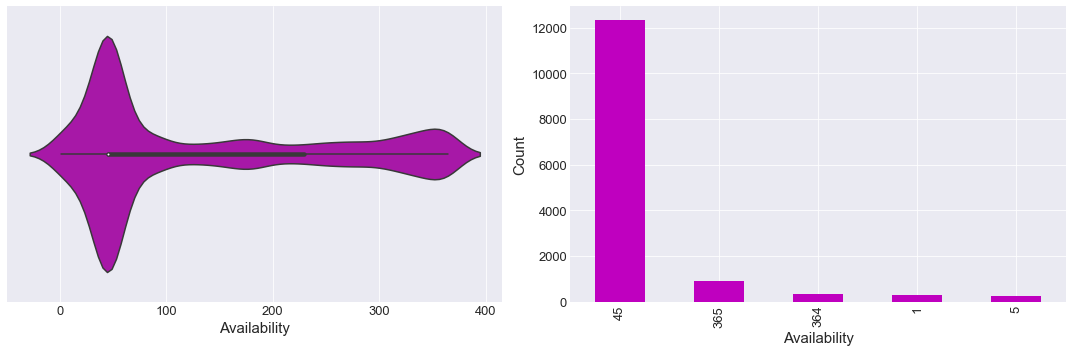

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.violinplot(df['availability_365'],color='m')
plt.xlabel('Availability',fontsize=15)
plt.subplot(122)
df['availability_365'].value_counts().sort_values(ascending = False).head(5).plot(kind='bar',color = 'm')
plt.xlabel('Availability',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

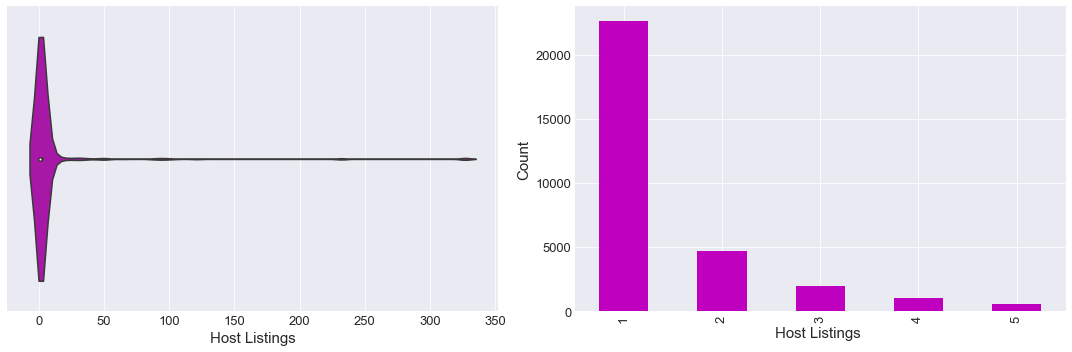

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.violinplot(df['calculated_host_listings_count'],color='m')
plt.xlabel('Host Listings',fontsize=15)
plt.subplot(122)
df['calculated_host_listings_count'].value_counts().sort_values(ascending = False).head(5).plot(kind='bar',color = 'm')
plt.xlabel('Host Listings ',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

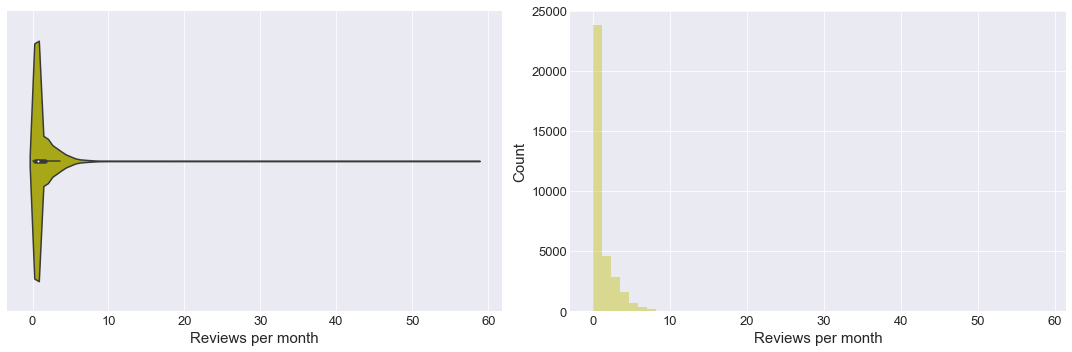

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.violinplot(df['reviews_per_month'],color='y')
plt.xlabel('Reviews per month',fontsize=15)
plt.subplot(122)
#df['reviews_per_month'].value_counts().sort_values(ascending = False).head(5).plot(kind='bar',color = 'm')
sns.distplot(df['reviews_per_month'], kde=False,color ='y')
plt.xlabel('Reviews per month',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

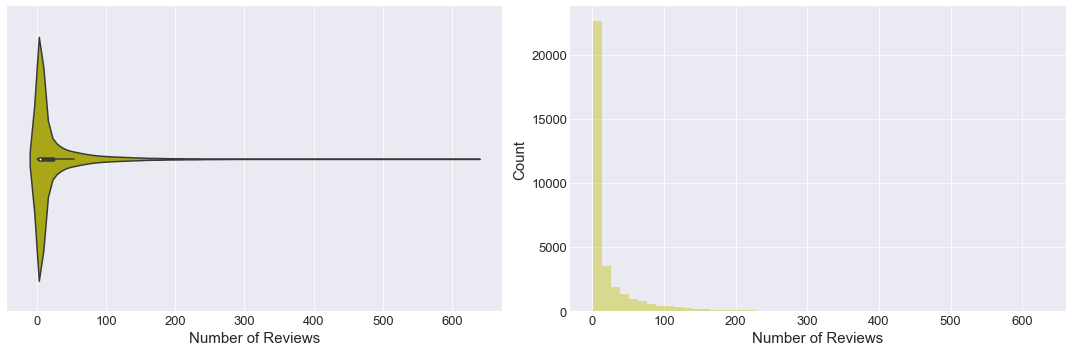

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.violinplot(df['number_of_reviews'],color='y')
plt.xlabel('Number of Reviews',fontsize=15)
plt.subplot(122)
#df['reviews_per_month'].value_counts().sort_values(ascending = False).head(5).plot(kind='bar',color = 'm')
sns.distplot(df['number_of_reviews'], kde=False,color ='y')
plt.xlabel('Number of Reviews',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

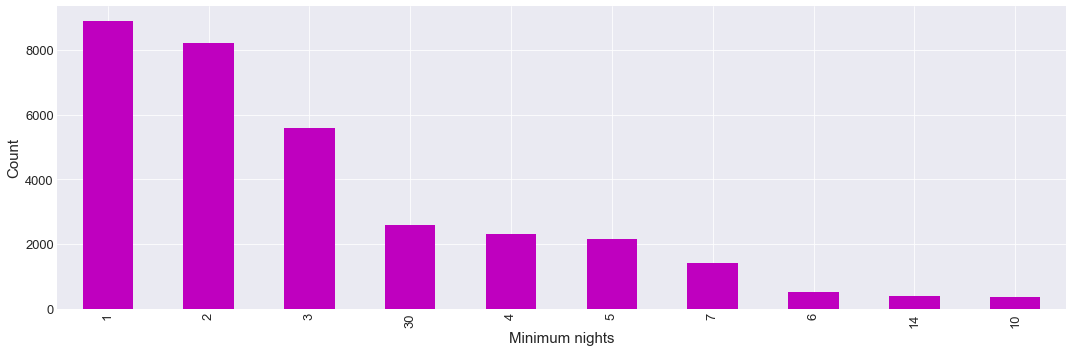

In [90]:
plt.figure(figsize=(15,5))
df['minimum_nights'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar',color = 'm')
#sns.distplot(df['minimum_nights'], kde=False,color ='y')
plt.xlabel('Minimum nights',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

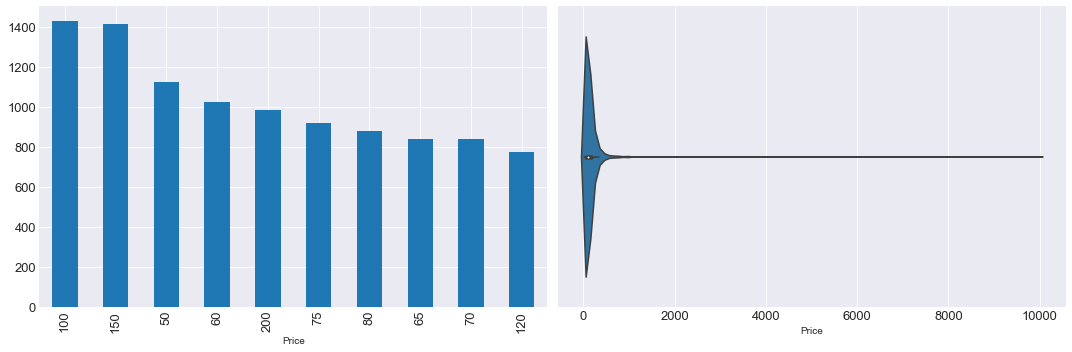

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(121)
df.price.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Price')
plt.subplot(122)
sns.violinplot(df['price'])
plt.xlabel('Price')
plt.tight_layout()
plt.show()